# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The problem here is, car dealers want to know what feature in a cars drives the price of a used-car. To solve this by creating a model that should provide the best car features that predict the price of a used car. In order to solve this we need a data of used cars prices with all of it's features.

The goal of the data mining is here is to gather the used-car's various features and price, and then process data and identify the patterns, then create a model to predict the important features.

The risks that involved in this is the quality of the data, if the data has more noise then it need to cleaned until data is good for modeling.

The libraries that are going to used here are as follows

In [108]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OrdinalEncoder


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Firstly, read the data from the source and convert in to the data frame that can be suitable for applying the above libraries.
Then look into the size and feature of the data, understand the each feature and it's data type by looking at the info of the data frame.

In [78]:
# Reading Data from source
df = pd.read_csv('data/vehicles.csv')

In [79]:
# Vehicles data information, that includes number of records, 
# features, its data types and most importantly nubmer of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [80]:
# Random sample of 10 to glance data
df.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
375421,7315702725,houston,37495,2020.0,ram,1500,NaN,NaN,gas,27378.0,clean,automatic,1C6SRFDT9LN227532,4wd,NaN,pickup,white,tx
315804,7316526529,eugene,15900,2008.0,ram,1500 quad cab,good,8 cylinders,gas,131000.0,clean,automatic,NaN,4wd,full-size,pickup,blue,or
208946,7311414476,saginaw-midland-baycity,8995,2011.0,ford,explorer,NaN,NaN,gas,154051.0,clean,automatic,1FMHK7D85BGA36567,NaN,NaN,NaN,NaN,mi
146615,7304165537,springfield,29995,2018.0,jeep,wrangler jk unlimited sport,NaN,NaN,gas,71383.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,il
339399,7315128266,scranton / wilkes-barre,37995,2012.0,ram,NaN,NaN,NaN,diesel,82676.0,clean,automatic,3C6UD5DL1CG104737,4wd,NaN,pickup,NaN,pa
146815,7316962135,"st louis, MO",38693,2016.0,gmc,sierra 1500,NaN,NaN,gas,75793.0,clean,automatic,NaN,4wd,NaN,pickup,NaN,il
224168,7310534724,billings,18999,2017.0,subaru,forester,like new,NaN,gas,73000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,mt
231312,7314966103,boone,5995,2002.0,toyota,highlander limited,excellent,6 cylinders,gas,160500.0,clean,automatic,NaN,fwd,mid-size,SUV,blue,nc
118981,7313425486,tampa bay area,9995,2017.0,chevrolet,sonic,NaN,NaN,gas,80280.0,clean,automatic,1G1JD5SH0H4159445,NaN,compact,sedan,silver,fl
134187,7307305809,east idaho,51500,2021.0,toyota,4runner trd off road,good,6 cylinders,gas,12784.0,clean,other,JTERU5JR6M5882916,NaN,NaN,other,white,id


By looking at the above sampling, it looks like the features Id, 
and VIN doesn't give any information about the car so dropping those.

In [81]:
# dropping colums
df = df.drop(columns=['id', 'VIN', 'region', 'state', 'model'])

In [82]:
df.head(10)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Also by looking at the above there are few row that of most features are NaN, which can be considered as outliers.
Identify those and drop form the data set.

In [83]:
# Define a threshold for the number of NaN values allowed in a row
threshold = 12

# Iterate through rows and drop rows with more than threshold NaN values
for index, row in df.iterrows():
    if row.isna().sum() > threshold:
        df.drop(index, inplace=True)
        
# Rest the index after dropping rows        
df.reset_index(drop=True, inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  size          120519 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 42.3+ MB


The current row count is 426880, there were 68 rows dropped.

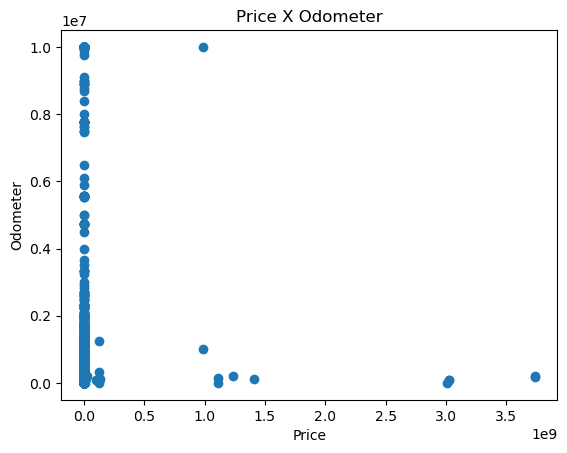

In [85]:
plt.scatter(df['price'], df['odometer'])
plt.xlabel('Price')
plt.ylabel('Odometer')
plt.title('Price X Odometer')
plt.show()

/var/folders/lw/_q0kwwfn54qb57xqwr015xgm0000gn/T/ipykernel_92811/1531176317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


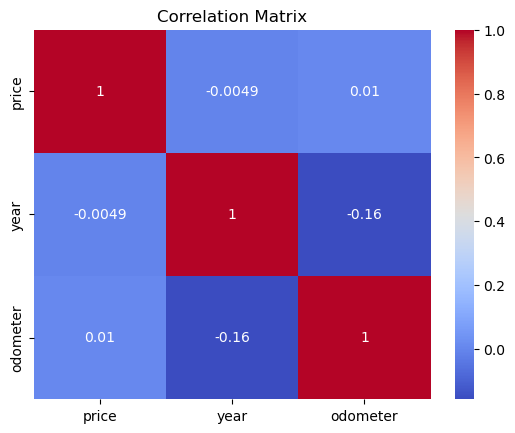

In [86]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'Fuel X Price')

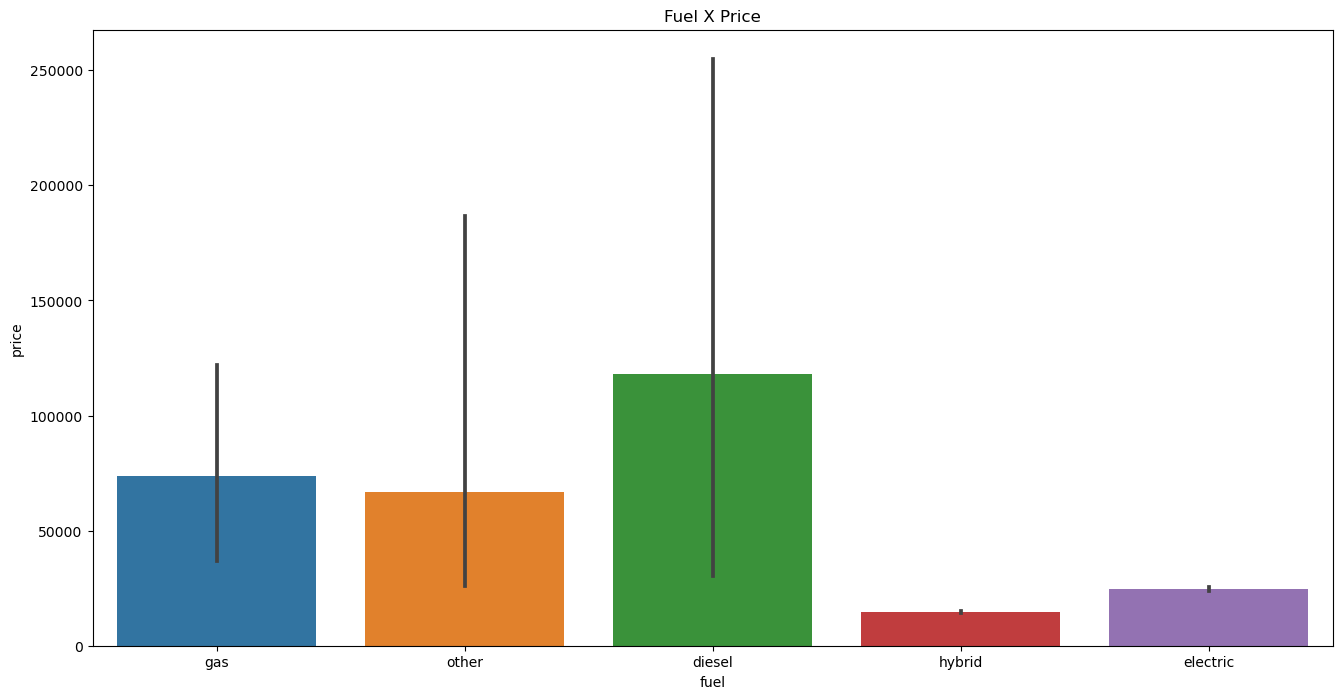

In [87]:
plt.figure(figsize=(16, 8))
sns.barplot(x='fuel', y='price', data=df)
plt.title('Fuel X Price')

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

After understanding and dropping outliers, we need further cleaning prior modeling, that includes finding the number of NaN and empty values and replace it with appropriate values.

In case of the price if there are 0 or 1 those can be consider as outliers.

In [88]:
# find the number of nan or empty vlaues
nan_or_empty_count = df.isna().sum() + df.eq('').sum()
print(f"number of NaN or empty values in each column \n{nan_or_empty_count}")

number of NaN or empty values in each column 
price                0
year              1205
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64


In [89]:
# drop the row if the price is 0 or 1, and nan values of year and odometer,  which consider as outliers
df = df[~df['price'].isin([0, 1])]
df = df.dropna(subset=['year', 'odometer'])

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388637 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         388637 non-null  int64  
 1   year          388637 non-null  float64
 2   manufacturer  373931 non-null  object 
 3   condition     239918 non-null  object 
 4   cylinders     230246 non-null  object 
 5   fuel          386511 non-null  object 
 6   odometer      388637 non-null  float64
 7   title_status  381415 non-null  object 
 8   transmission  387118 non-null  object 
 9   drive         269966 non-null  object 
 10  size          109629 non-null  object 
 11  type          304162 non-null  object 
 12  paint_color   273466 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 41.5+ MB


In [91]:
df = df.fillna("unknown")
nan_or_empty_count = df.isna().sum() + df.eq('').sum()
print(f"number of NaN or empty values in each column \n{nan_or_empty_count}")

number of NaN or empty values in each column 
price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## Model 1
Linear regression with sequential feature selection.

In [99]:
df1 = df
df1

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
27,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,unknown,unknown,pickup,white
28,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,unknown,unknown,pickup,blue
29,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,unknown,unknown,pickup,red
30,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,unknown,unknown,pickup,red
31,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,unknown,sedan,unknown
426876,30590,2020.0,volvo,good,unknown,gas,12029.0,clean,other,fwd,unknown,sedan,red
426877,34990,2020.0,cadillac,good,unknown,diesel,4174.0,clean,other,unknown,unknown,hatchback,white
426878,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,unknown,sedan,silver


In [100]:
# looks like the Cylinders and condition is ordinal instead of categorical  
print(f"Unique values of cylinders feature: \n{df1['cylinders'].unique()}")
print(f"Unique values of condition feature: \n{df1['condition'].unique()}")

Unique values of cylinders feature: 
['8 cylinders' '6 cylinders' 'unknown' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
Unique values of condition feature: 
['good' 'excellent' 'fair' 'unknown' 'like new' 'new' 'salvage']


In [101]:
# Defining the ordinal categories and their order
condition_levels = ['salvage', 'unknown', 'fair', 'good', 'like new', 'excellent', 'new' ]
cylinders_levels = ['unknown', 'other', '3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders',
                   '10 cylinders', '12 cylinders']
title_status = ['unknown', 'salvage', 'rebuilt', 'parts only', 'missing', 'lien', 'clean']

# Creating ordinal encoder instance
encoder = OrdinalEncoder(categories=[condition_levels])
cylinders_encoder = OrdinalEncoder(categories=[cylinders_levels])
title_encoder = OrdinalEncoder(categories=[title_status])
# transforming
df1['condition'] = encoder.fit_transform(df1[['condition']])
df1['cylinders'] = cylinders_encoder.fit_transform(df1[['cylinders']])
df1['title_status'] = title_encoder.fit_transform(df1[['title_status']])

In [102]:
df1

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
27,33590,2014.0,gmc,3.0,6.0,gas,57923.0,6.0,other,unknown,unknown,pickup,white
28,22590,2010.0,chevrolet,3.0,6.0,gas,71229.0,6.0,other,unknown,unknown,pickup,blue
29,39590,2020.0,chevrolet,3.0,6.0,gas,19160.0,6.0,other,unknown,unknown,pickup,red
30,30990,2017.0,toyota,3.0,6.0,gas,41124.0,6.0,other,unknown,unknown,pickup,red
31,15000,2013.0,ford,5.0,5.0,gas,128000.0,6.0,automatic,rwd,full-size,truck,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,3.0,5.0,gas,32226.0,6.0,other,fwd,unknown,sedan,unknown
426876,30590,2020.0,volvo,3.0,0.0,gas,12029.0,6.0,other,fwd,unknown,sedan,red
426877,34990,2020.0,cadillac,3.0,0.0,diesel,4174.0,6.0,other,unknown,unknown,hatchback,white
426878,28990,2018.0,lexus,3.0,5.0,gas,30112.0,6.0,other,fwd,unknown,sedan,silver


In [110]:
# splitting test and train data
X1_categorical_features = ['manufacturer', 'fuel', 'transmission', 'drive', 'size', 'type', 'paint_color']

hot_encoded_df = pd.get_dummies(df1[X1_categorical_features])

df1 = pd.concat([df1, hot_encoded_df], axis=1)
df1.drop(columns=X1_categorical_features, inplace=True)

X1 = df1.drop('price', axis = 1)
y1 = df1['price']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.3, random_state=42)

In [112]:
# Sequential Feature Selection
pipe_1 = Pipeline([('feature_selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=6)),
                  ('linereg', LinearRegression())])

In [113]:
pipe_1.fit(X1_train, y1_train)

Pipeline(steps=[('feature_selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=6)),
                ('linereg', LinearRegression())])

In [114]:
sf_train_mse = mean_squared_error(y1_train, pipe_1.predict(X1_train))
sf_test_mse = mean_squared_error(y1_test, pipe_1.predict(X1_test))
print(f"Train MSE: {sf_train_mse} and Test MSE: {sf_test_mse}")

Train MSE: 154883939279135.88 and Test MSE: 181973336366337.2


In [115]:
coefs = pipe_1.named_steps['linereg'].coef_
feature_names = pipe_1.named_steps['feature_selector'].get_feature_names_out()
#feature_selector.get_feature_names_out()
print(coefs)
print(feature_names)
pd.DataFrame({
    'features': feature_names,
    'revelance score': coefs
}).sort_values(by='revelance score', ascending=False)

[ 4.18741667e+10  5.31016940e+04 -5.06930764e+16 -4.18741775e+10
 -5.69706529e+04  5.06930764e+16]
['manufacturer_aston-martin' 'manufacturer_ferrari' 'fuel_gas'
 'manufacturer_aston-martin' 'manufacturer_land rover' 'fuel_gas']


,features,revelance score
5,fuel_gas,5.069308e+16
0,manufacturer_aston-martin,4.187417e+10
1,manufacturer_ferrari,5.310169e+04
4,manufacturer_land rover,-5.697065e+04
3,manufacturer_aston-martin,-4.187418e+10
2,fuel_gas,-5.069308e+16


## Model 2 
A Ridge Model with polynomial features at degree 2 with GridSearchCV

In [92]:
# splitting data into train and test sets
X = df.drop('price', axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [93]:
# listing the categorical features that going to be transformed
X_categorical_features = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 
                          'transmission', 'drive', 'size', 'type', 'paint_color']
# column trnasformer hot encoding
column_transformer = make_column_transformer((OneHotEncoder(drop='if_binary', handle_unknown='ignore'), X_categorical_features),
                                            verbose_feature_names_out=False, remainder="passthrough")

In [94]:
# creating degree 2 polinomial features
ploy_2 = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

pipe = Pipeline([('col_transform', column_transformer),
                 ('ploy', ploy_2),
                 ('scale', StandardScaler(with_mean=False)), 
                 ('ridge', Ridge())])

alpha_params = {'ridge__alpha': np.linspace(100000, 100000000, 10)}

# grid searh
grid = GridSearchCV(estimator=pipe, param_grid=alpha_params, error_score='raise', n_jobs=4)

In [95]:
grid.fit(X_train, y_train)

/Users/vinayreddymaligireddy/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vinayreddymaligireddy/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vinayreddymaligireddy/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vinayreddymaligireddy/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('col_transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore'),
                                                                         ['manufacturer',
                                                                          'condition',
                                                                          'cylinders',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'size',
                                                                          'type',
                                                                          'paint_color'])],
                                                          verbose_feature_names_out=False)),
                                       ('ploy',
                                        PolynomialFeatures(include_bias=False,
                                                           interaction_only=True)),
                                       ('scale',
                                        StandardScaler(with_mean=False)),
                                       ('ridge', Ridge())]),
             n_jobs=4,
             param_grid={'ridge__alpha': array([1.00e+05, 1.12e+07, 2.23e+07, 3.34e+07, 4.45e+07, 5.56e+07,
       6.67e+07, 7.78e+07, 8.89e+07, 1.00e+08])})

In [96]:
print(f"Best Ridge Alpha : {grid.best_params_}")
print(f"Best Model : {grid.best_estimator_}")

Best Ridge Alpha : {'ridge__alpha': 100000000.0}
Best Model : Pipeline(steps=[('col_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color'])],
                                   verbose_feature_names_out=False)),
                ('ploy',
                 PolynomialFeatures(include_bias=False, interaction_only=True))

In [97]:
train_mse = mean_squared_error(y_train, grid.predict(X_train))
test_mse = mean_squared_error(y_test, grid.predict(X_test))
print(f"Train MSE: {train_mse} and Test MSE: {test_mse}")

Train MSE: 154872421163766.16 and Test MSE: 181970357144187.6


In [98]:
# feature selection
imp_features = permutation_importance(grid, X_test, y_test, n_repeats=30, random_state=42)

pd.DataFrame({
    'features': X.columns,
    'revelance score': imp_features.importances_mean
}).sort_values(by='revelance score', ascending=False)

,features,revelance score
1,manufacturer,7.033164e-06
5,odometer,4.793974e-06
10,type,4.719167e-06
7,transmission,1.692249e-06
8,drive,1.482022e-06
3,cylinders,1.339788e-06
2,condition,1.161428e-06
11,paint_color,8.936725e-07
6,title_status,1.715607e-07
0,year,1.141945e-07


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

The first model performed is sequential feature selection with linear regression, it resulted in as hight MSE, such as

Train MSE: 154883939279135.88 and Test MSE: 181973336366337.2

And the model predicted features are not that accurate.

After evaluating the first model, applied different technique to perform the model to get better accuracy.

The second model performed is Redge with polynomial degree 2 transformation, which resulted in slightly better MSE.

Train MSE: 154872421163766.16 and Test MSE: 181970357144187.6

The order of the feature most to lest important predicated by the model are Manufacturer, Odometer, Type, Transmission, Drive, Cylinder, Condition, Pain_color, title_status, year, fuel and size.

Feature selected by this model is more reasonable than the first model, this can be bring back to the client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

The top five features of a used car that drives the price predicted by the model are vehicle manufacturer, Odometer for miles vehicle driven, type, transmission, and Drive. Auto dealers can apply this as one metric to sell or by a used car. This can be monitored through the future sales and optimize if necessary.